In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

# %config InlineBackend.figure_format = 'png'
# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 200


In [32]:
def gray(p):
    return (p,p,p)

In [54]:
x = np.linspace(0,5,100)
y = x*np.sin(x)

xt = np.arange(6)

ɛ = np.random.normal(0,1,size=xt.size)
ɛ2 = np.random.normal(0,1,size=xt.size)

yt1 = xt*np.sin(xt) + ɛ
yt2 = xt*np.sin(xt) + ɛ2
yobs = y + np.random.normal(0,1,size=x.size)

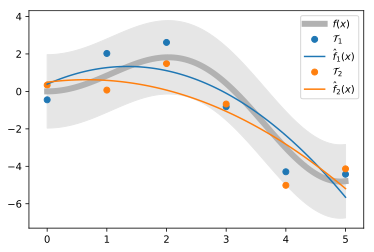

In [66]:
b=plt.fill_between(x,y-1.96,y+1.96,color=gray(0.9),label="95% observation interval")
a=plt.plot(x,y,'r',lw=6,label="$f(x)$",color=gray(0.7));

#plt.scatter(x,yobs,alpha=0.1,label="")
yhat=Pipeline([('poly',PolynomialFeatures(2)),('linreg',LinearRegression())]).fit(xt.reshape(-1,1),yt1).predict(x.reshape(-1,1))
yhat2=Pipeline([('poly',PolynomialFeatures(2)),('linreg',LinearRegression())]).fit(xt.reshape(-1,1),yt2).predict(x.reshape(-1,1))
e=plt.scatter(xt,yt1,color="C0",label="$\mathcal{T}_1$");
f=plt.scatter(xt,yt2,color="C1",label="$\mathcal{T}_2$");
c=plt.plot(x,yhat,color='C0',label="$\hat{f}_1(x)$")
d=plt.plot(x,yhat2,color='C1',label="$\hat{f}_2(x)$")

labs = [a[0],e,c[0],f,d[0]]
plt.legend(labs, [lab.get_label() for lab in labs],loc=1);

In [27]:
def multifit(deg):
    K = 100
    pipe = Pipeline([('poly',PolynomialFeatures(deg)),('linreg',LinearRegression())])
    yhats = np.zeros((x.size,K))
    numpoints = 6
    
    for k in range(100):
        xt = np.arange(6).reshape(-1,1) 
        #xt = np.random.uniform(0,5,size=(numpoints,1))
        yt = xt*np.sin(xt)
        ɛ = np.random.normal(0,1,size=(numpoints,1))
        pipe.fit(xt, yt+ɛ)
        yhat = pipe.predict(x.reshape(-1,1))
        yhats[:,k] = yhat.flatten()
        #plt.plot(x,yhat,alpha=0.1,color='k')
        plt.ylim(-8,5)
    
    #plt.plot(x,y,'white',lw=5)
    #plt.plot(x,y,'red',lw=3)
    return yhats
    

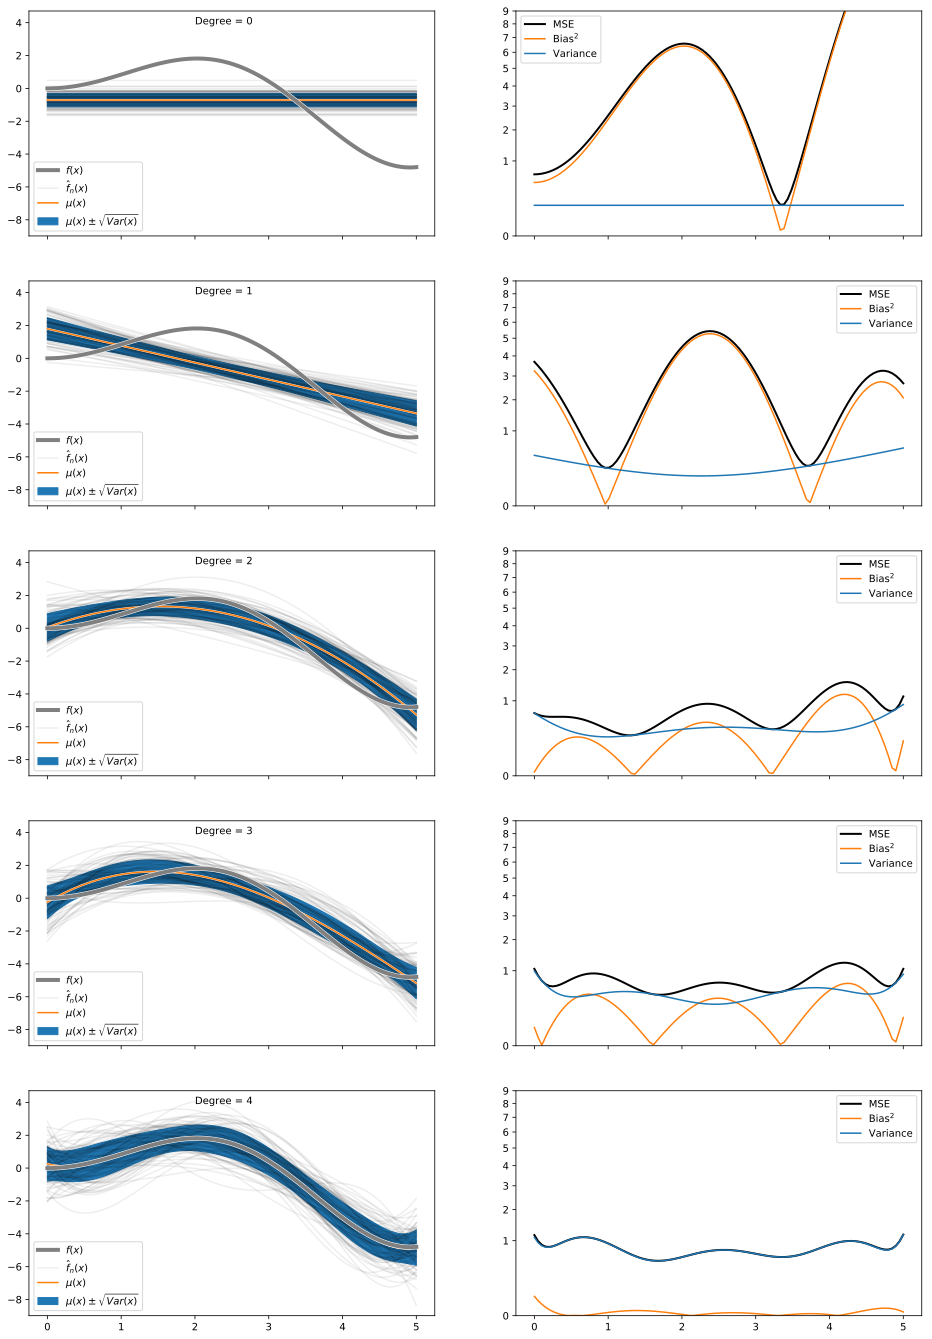

In [71]:
degmax = 4

fig,ax = plt.subplots(degmax+1,2, sharex='col',sharey='col',figsize=(8*2,6*degmax))

# plt.figure(figsize=(8*2,6*degmax))
for deg in range(0,degmax+1):
    yhats = multifit(deg)
    yhat = np.mean(yhats,1)
    one_se = np.std(yhats,1)
    # plt.subplot(degmax,2,deg*2-1)
    #plt.text(2.5,4,f"Degree = {deg}")
    #plt.plot(x,yhats,color='k',alpha=0.05);
    #plt.plot(x,y,'white',lw=4)
    #plt.plot(x,y,'red',lw=2)
    #plt.ylim(-8,5)
    
    ax1 = ax[deg,0]
    ax1.text(2,3.9,f"Degree = {deg}")
    b=ax1.plot(x,yhats,color='k',alpha=0.07,label="$\hat{f}_n(x)$")
    #ax1.set_ylim(-9,9)

    d=ax1.fill_between(x,yhat-one_se,yhat+one_se,color='C0', label="$\mu(x) \pm \sqrt{Var(x)}$")

    ax1.plot(x,yhat,color='white',lw=2)
    c=ax1.plot(x,yhat,color='C1',label="$\mu(x)$")

    ax1.plot(x,y,'white',lw=5)
    a=ax1.plot(x,y,color=gray(0.5),lw=4,label="$f(x)$")

    
    #ax1.plot(x,yhat-one_se, color='white',lw=4)
    #ax1.plot(x,yhat+one_se, color='white',lw=4)
    #ax1.plot(x,yhat-one_se, color='C1',lw=2)
    #ax1.plot(x,yhat+one_se, color='C1',lw=2)
    
    #ax1.plot(x,yhat,color='C1',lw=4)
    #ax1.plot(x,yhat,color='C0', lw=2)
    labs = [a[0],b[0],c[0],d]
    ax1.legend(labs, [lab.get_label() for lab in labs],loc=3);
    
    ax2 = ax[deg,1]
    
    mse = np.mean((yhats - y.reshape(-1,1))**2,1)
    ax2.plot(x,np.sqrt(mse),'k', label="MSE",lw=2)
    
    bias = np.mean(yhats - y.reshape(-1,1),1)
    
    bias2 = bias**2
    #plt.plot(x,bias2,'C0')
    ax2.plot(x,np.sqrt(bias2),'C1',label="Bias$^2$")
    ax2.set_ylim(0,3)
    
    
    var = np.var(yhats,1)
    ax2.plot(x,np.sqrt(var),'C0', label="Variance")
    
    #plt.plot(x,var,'C1')
    
    
    

    #plt.plot(x,mse,'C2')
    ax2.set_yticks([np.sqrt(n) for n in range(10)])
    ax2.set_yticklabels(['0','1','2','3','4','5','6','7','8','9'])
    
    ax2.legend()
    #σ2 = mse - bias2 - var
    #ax2.plot(x,σ2,'C4')
    
    #plt.ylim(0,4)
plt.savefig(fname="bias-variance.svg")
plt.savefig(fname="bias-variance.pdf")
plt.savefig(fname="bias-variance.png",dpi=200)